In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline
sns.set(style="white", color_codes=True)

In [2]:
dataset = load_iris()
feature_names = [i.strip(' (cm)') for i in dataset.feature_names]
iris = pd.DataFrame(data=dataset.data, columns=feature_names)

species_dict={0:'Setosa' ,1:'Versicolour', 2:'Virginica'}
iris['species'] = pd.Series(dataset.target).map(species_dict)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 探索sepal length与sepal width之间的联系

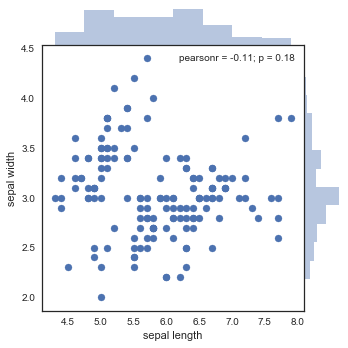

In [3]:
sns.jointplot(x='sepal length', y='sepal width', data=iris, kind='scatter', size=5, ratio=7, space=0, color="b")

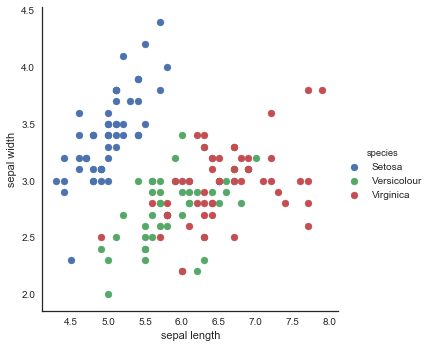

In [4]:
g = sns.FacetGrid(iris, hue="species", size=5)
g.map(plt.scatter, "sepal length", "sepal width").add_legend()

### 绘制不同品种petal length的箱型图、散点图

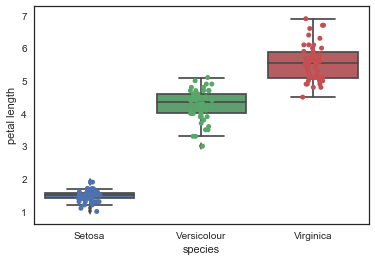

In [5]:
sns.boxplot(x="species", y="petal length", data=iris)
sns.stripplot(x="species", y="petal length", data=iris, jitter=True)

### 运用小提琴图查看不同品种的petal length分布

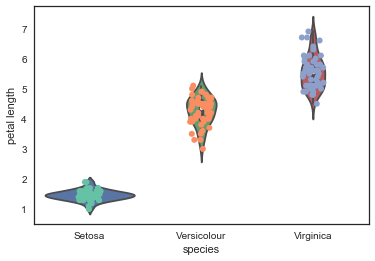

In [6]:
sns.violinplot(x="species", y="petal length", data=iris, size=6)
sns.stripplot(x="species", y="petal length", data=iris, jitter=True, size=6, palette='Set2')

### 绘制不同品种的petal length对应的KDE曲线

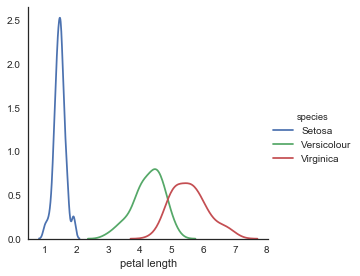

In [7]:
sns.FacetGrid(iris, hue="species", size=4) \
   .map(sns.kdeplot, "petal length").add_legend()

### 绘制特征之间的两两相关图

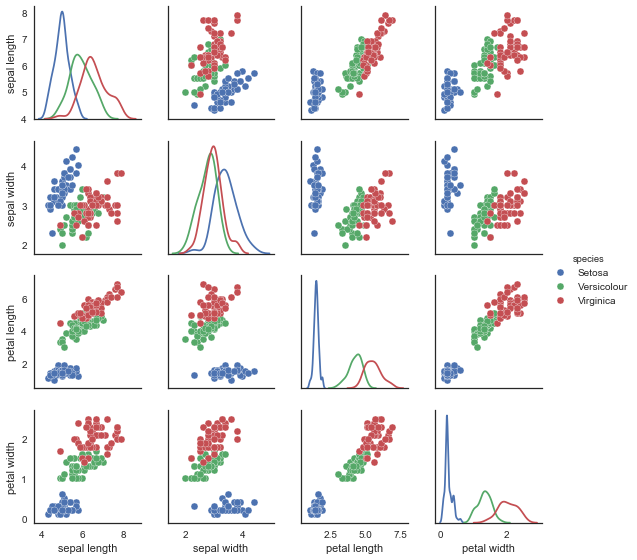

In [8]:
sns.pairplot(iris, hue="species", size=2, diag_kind='kde')

### 运用pandas自带的boxplot函数绘制所有数值型特征的箱型图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A016F194A8>,
      dtype=object)

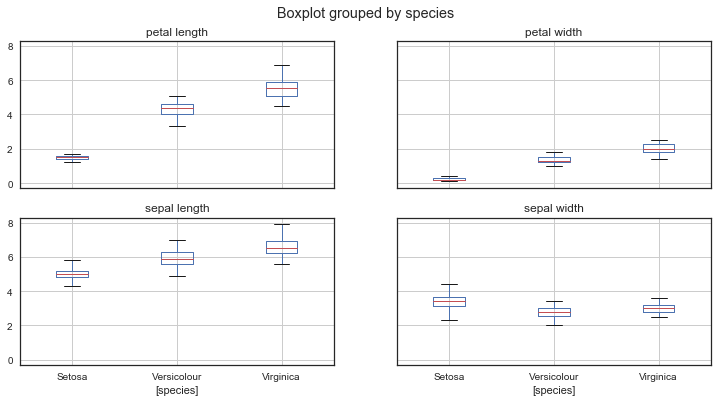

In [9]:
iris.boxplot(by="species", figsize=(12, 6))

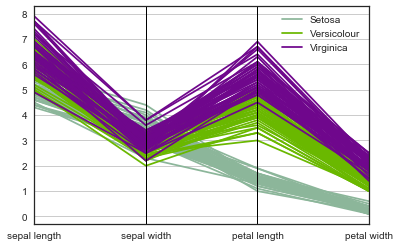

In [10]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "species")

### Andrews曲线

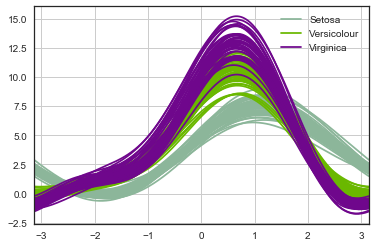

In [11]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, "species")